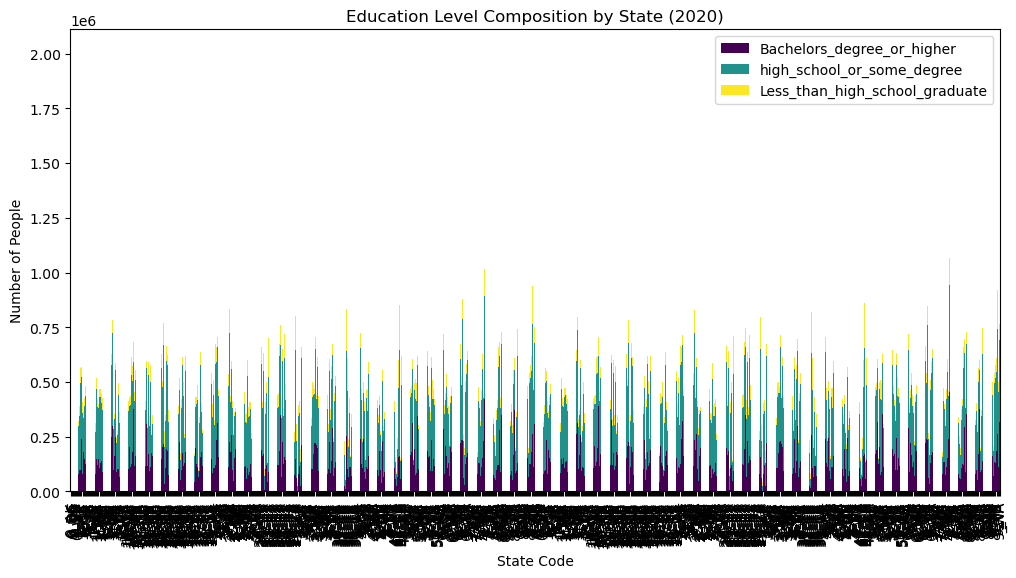

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
edu = pd.read_csv('../working/Educationv.csv')

# Pivoting data for stacked bar plot
edu_plot = edu.set_index('cd')[['Bachelors_degree_or_higher','high_school_or_some_degree','Less_than_high_school_graduate']]

# Plot stacked bar chart
edu_plot.plot(kind='bar', stacked=True, figsize=(12,6), colormap='viridis')
plt.title('Education Level Composition by State (2020)')
plt.ylabel('Number of People')
plt.xlabel('State Code')
plt.show()

In [4]:
# Compute total population per row
edu['Total'] = edu[['Bachelors_degree_or_higher','high_school_or_some_degree','Less_than_high_school_graduate']].sum(axis=1)

# Compute percentages
edu['Pct_Bachelors'] = edu['Bachelors_degree_or_higher'] / edu['Total'] * 100
edu['Pct_HighSchool'] = edu['high_school_or_some_degree'] / edu['Total'] * 100
edu['Pct_LessThanHS'] = edu['Less_than_high_school_graduate'] / edu['Total'] * 100

print(edu[['cd','Pct_Bachelors','Pct_HighSchool','Pct_LessThanHS']])

       cd  Pct_Bachelors  Pct_HighSchool  Pct_LessThanHS
0    0_AK      26.078024       66.692365        7.229611
1    0_DC      56.700267       36.227506        7.072226
2    0_DE      30.045856       60.177563        9.776581
3    0_ND      29.494780       64.811636        5.693584
4    0_PR      26.078024       66.692365        7.229611
..    ...            ...             ...             ...
869  9_PA      22.189963       67.829110        9.980927
870  9_TN      30.278789       59.320704       10.400507
871  9_TX      28.498183       51.898657       19.603160
872  9_VA      22.604970       67.811318        9.583712
873  9_WA      41.637314       49.144013        9.218673

[874 rows x 4 columns]


In [5]:
## Ranking state by bachelor's degree
top_bachelors = edu.sort_values('Pct_Bachelors', ascending=False).head(5)
bottom_bachelors = edu.sort_values('Pct_Bachelors').head(5)

print("Top 5 states with highest Bachelor degrees:")
print(top_bachelors[['cd','Pct_Bachelors']])

print("\nBottom 5 states with lowest Bachelor degrees:")
print(bottom_bachelors[['cd','Pct_Bachelors']])

Top 5 states with highest Bachelor degrees:
        cd  Pct_Bachelors
759   5_IL      83.160115
322   5_IL      82.190879
84   12_NY      72.355884
521  12_NY      71.683923
700  36_CA      70.196436

Bottom 5 states with lowest Bachelor degrees:
        cd  Pct_Bachelors
213  29_TX       6.860038
650  29_TX       6.955848
182  21_CA       7.577235
619  21_CA       8.018914
257  33_CA      10.066044


In [6]:
# Higher weight for higher education
edu['Education_Score'] = edu['Bachelors_degree_or_higher']*3 + edu['high_school_or_some_degree']*2 + edu['Less_than_high_school_graduate']

# Sort by score
edu_sorted = edu.sort_values('Education_Score', ascending=False)
print(edu_sorted[['cd','Education_Score']].head(10))

        cd  Education_Score
441   0_PR          4323904
826   7_NY          2462441
750  48_CA          2386949
313  48_CA          2367081
389   7_NY          2331526
255  32_CA          2289657
692  32_CA          2254990
660   3_IL          2234659
223   3_IL          2213498
551  16_CA          2017123


In [8]:
# Prepare data for heatmap
edu_heatmap = edu.set_index('cd')[['Pct_Bachelors','Pct_HighSchool','Pct_LessThanHS']]

# Optional: sort by Bachelors percentage
edu_heatmap = edu_heatmap.sort_values('Pct_Bachelors', ascending=False)

# Plot heatmap with larger figure and rotated labels
plt.figure(figsize=(12, len(edu_heatmap)/2))  # height depends on number of states
sns.heatmap(edu_heatmap, annot=True, cmap='YlGnBu', fmt=".1f", cbar_kws={'label':'Percentage'})
plt.title("Education Level Percentages by State")
plt.ylabel("State Code")
plt.xlabel("Education Level")
plt.yticks(rotation=0)  # keep state labels horizontal
plt.xticks(rotation=45)  # rotate education labels
plt.tight_layout()
plt.show()